<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_29_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together. There are many different approaches and algorithms to perform clustering tasks. In this post, I will cover one of the common approaches which is hierarchical clustering.

Clustering simply means grouping similar things together. However, it is not as simple as it sounds. One of challenges associated with clustering is that we almost always do not know the number clusters (or groups) within the data set beforehand.

One of the advantages of hierarchical clustering is that we do not have to specify the number of clusters (but we can). Let’s dive into details after this short introduction.

Hierarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering:

* Agglomerative clustering
* Divisive clustering


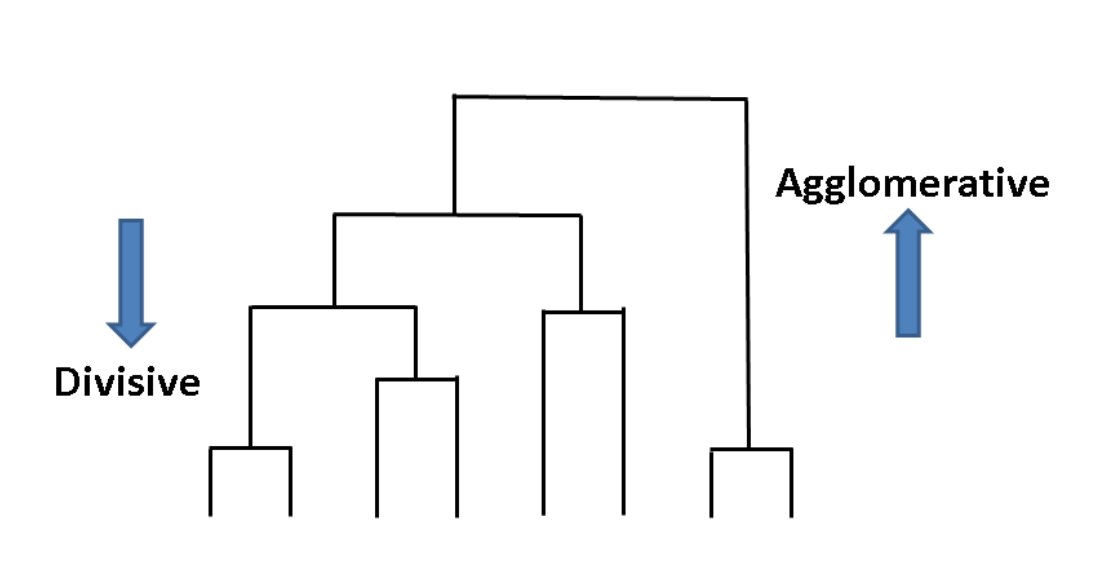

# Agglomerative clustering
Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined. Let’s go over an example to explain the concept clearly.

We have a dataset consists of 9 samples. I choose numbers associated with these samples to demonstrate the concept of similarity. At each iteration (or level), the closest numbers (i.e. samples) are combined together. As you can see in the figure below, we start with 9 clusters. The closest ones are combined at the first level and then we have 7 clusters. The number of black lines that intersect with blue lines represents the number of clusters.

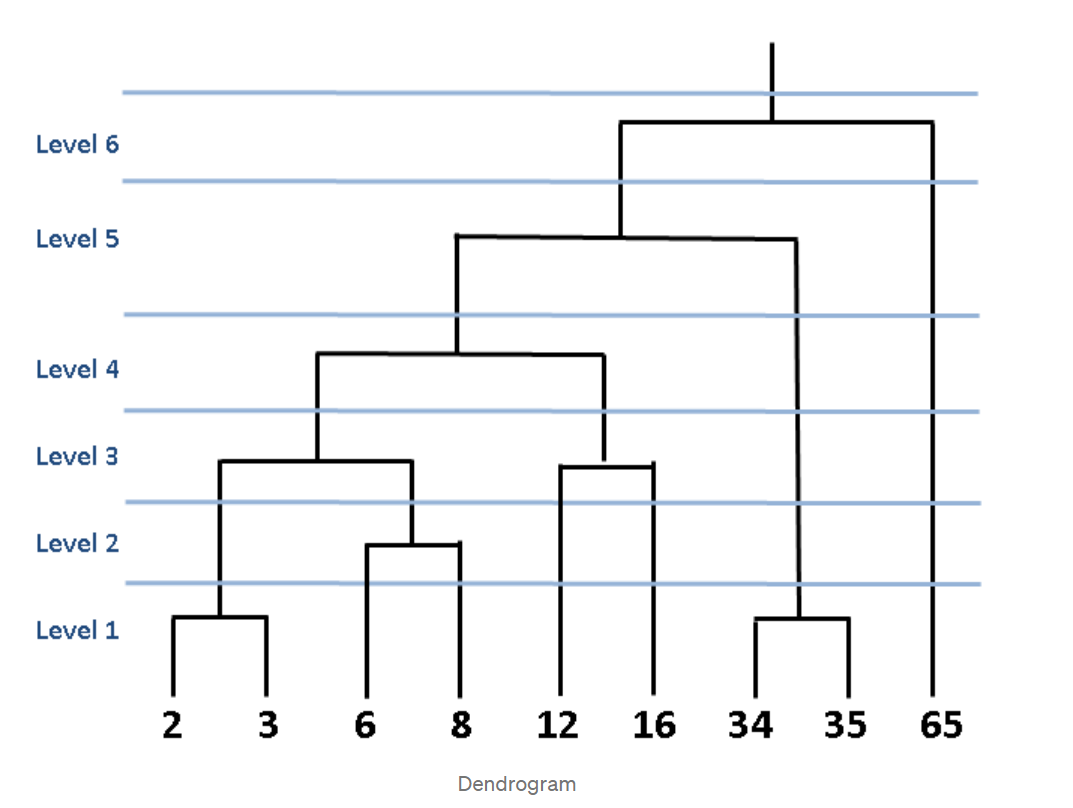

The figure above is called dendrogram which is a diagram representing tree-based approach. In hierarchical clustering, **dendrograms are used to visualize the relationship among clusters.**

As we go up, the number of clusters decreases as more samples are combined. After level 6, all samples are combined under one big cluster.

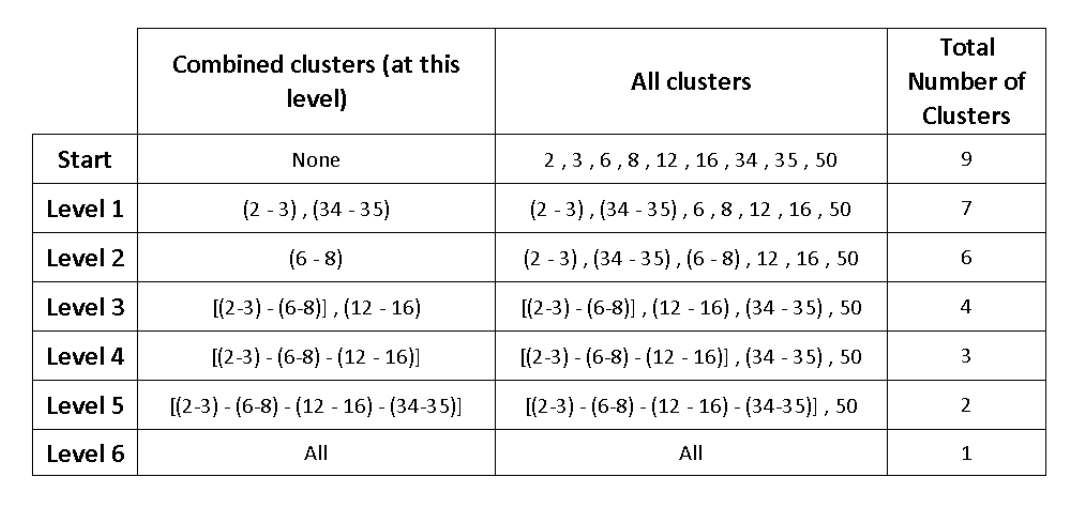

This is a very simple data set to illustrate the purpose but real life data sets are obviously more complex. We mention that “closest data points (or clusters)” are combined together. But how do the algorithms identify closest ones? There are 4 different methods implemented in scikit-learn to measure the similarity:

* **Ward’s linkage:** Minimizes the variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed.
* **Average linkage:** Average distance of each data point in two clusters.
* **Complete (maximum) linkage:** Maximum distance among all data points in two clusters.
* **Single (minimum) linkage:** Maximum distance among all data points in two clusters.

The default selection is ward’s linkage which works well on most datasets.

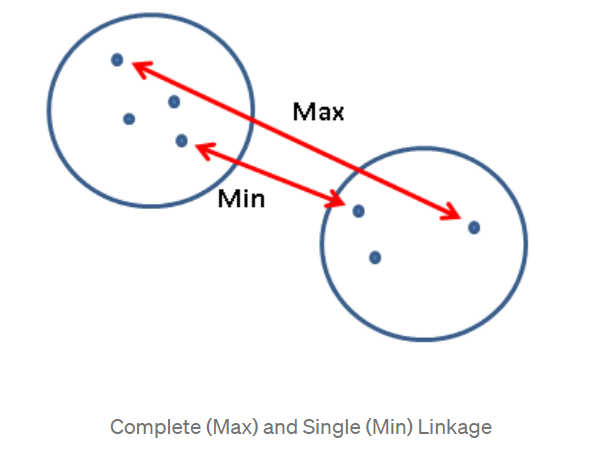

One of the advantages of hierarchical clustering is that we do not have to specify the number of clusters beforehand. However, it is not wise to combine all data points into one cluster. We should stop combining clusters at some point. Scikit-learn provides two options for this:

* Stop after a number of clusters is reached (n_clusters)

* Set a threshold value for linkage (distance_threshold). If the distance between two clusters are above the threshold, these clusters will not be merged.

# Divisive Clustering
Divisive clustering is not commonly used in real life so I will mention it briefly. Simple yet clear explanation is that divisive clustering is the opposite of agglomerative clustering. We start with one giant cluster including all data points. Then data points are separated into different clusters. It is an up to bottom approach.

## Pros

* Do not have to specify the number of clusters beforehand. The number of clusters must be specified for k-means algorithm.

* It is easy to implement and interpretable with the help of dendrograms.

* Always generates the same clusters. K-means clustering may result in different clusters depending on the how the centroids (center of cluster) are initiated.

## Cons

* It is a slower algorithm compared to k-means. Hierarchical clustering takes long time to run especially for large data sets.


# Hierarchical Clustering Applications
Hierarchical clustering is useful and gives better results if the underlying data has some sort of hierarchy.

### Some common use cases of hierarchical clustering:

* Genetic or other biological data can be used to create a dendrogram to represent mutation or evolution levels. **Phylogenetic trees** are used to show evolutionary relationships based on similarities and differences. As stated on wikipedia:

*A phylogenetic tree or evolutionary tree is a branching diagram or “tree” showing the evolutionary relationships among various biological species or other entities based upon similarities and differences in their physical or genetic characteristics.*

* These trees are also used to distinguish different types of viruses.

* Hierarchical clustering is also used for grouping text documents. However, it is a highly complex task due the high-dimensionality of data.

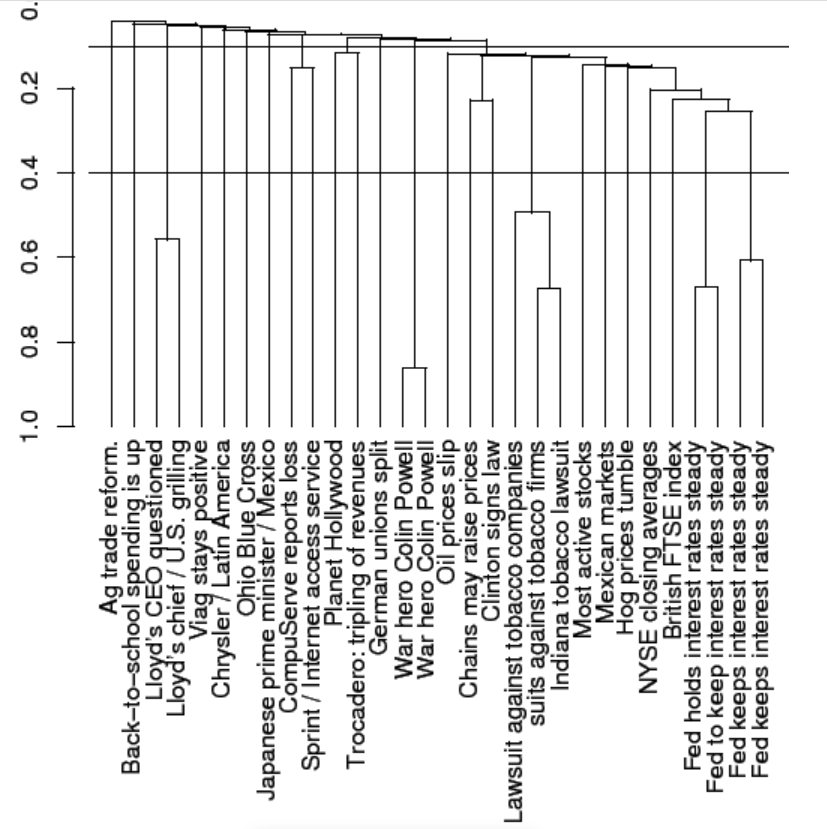

* Another common use case of hierarchical clustering is social network analysis.
* Hierarchical clustering is also used for outlier detection.

# Scikit Learn Implementation
We will use iris data set that is available under the datasets module of scikit learn. Let’s start with importing the data set:

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

Iris data set includes 150 data points. We will only use the first 50 data points so that the dendrogram seems more clear.

In [2]:
X = X[:50, :]
X.shape
(50, 4)

(50, 4)

Then we import AgglomerativeClustering class and build a model.



In [3]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Please keep in mind that if distance_threshold parameter is not None, n_cluster parameter must be None. I do not set any condition just to visualize a complete tree.

Next step is to fit model to the data:

In [4]:
model = model.fit(X)


Before drawing a dendrogram, we can check the details of our model using available methods:

In [5]:
# Number of clusters
model.n_clusters_
50
# Distances between clusters
distances = model.distances_
distances.min()
0.09999999999999964
distances.max()
3.828052620290243

3.828052620290243

Scikit learn does not provide dendrograms so we will use the dendrogram of SciPy package.

In [6]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

We first create a linkage matrix:



In [7]:
Z = hierarchy.linkage(model.children_, 'ward')


We use the children from the model and a linkage criterion which I choose to be ‘ward’ linkage.

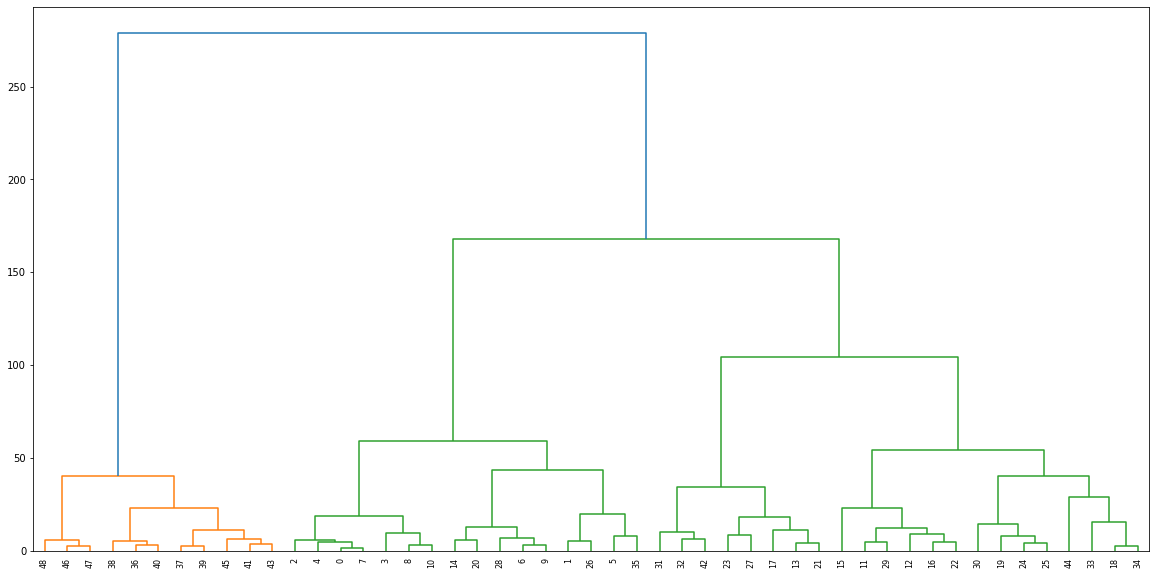

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

The labels of leafs are the indices of data points.

We can control the number of cluster by adjusting distance_thresold or n_cluster parameters. Let’s check the calculated distances between clusters:

In [11]:
model.distances_


array([0.1       , 0.1       , 0.1       , 0.1       , 0.14142136,
       0.14142136, 0.14142136, 0.14142136, 0.14142136, 0.14142136,
       0.14142136, 0.17320508, 0.17320508, 0.18257419, 0.2       ,
       0.2081666 , 0.21602469, 0.21602469, 0.25819889, 0.27568098,
       0.28284271, 0.29439203, 0.29439203, 0.31358146, 0.31464265,
       0.31622777, 0.33166248, 0.33665016, 0.34641016, 0.36968455,
       0.40620192, 0.42229532, 0.43969687, 0.43969687, 0.46726153,
       0.54772256, 0.59441848, 0.6244998 , 0.6363961 , 0.66269651,
       0.77628542, 0.81873887, 0.85556999, 0.90998199, 1.10513951,
       1.25399362, 1.37126983, 1.91875287, 3.82805262])

Distances are in ascending order. If we can set the distance_thresold as 0.8, number of clusters will be 9. There are 8 distances greated than 0.8 so, when combined, 9 clusters will be formed.

In [12]:
model = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model = model.fit(X)
model.n_clusters_

9

# References:
1. https://medium.com/analytics-vidhya/unsupervised-learning-hierarchical-clustering-and-dbscan-c38ffd8273d2

2. https://github.com/UCL-DSS/hierarchical_clustering/blob/main/Workshop.ipynb